In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# add the parent directory to the python path in order to be able to import the posCouche module 
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from posCouche.poscouche import poscouche
from posCouche.ic_utils import WEST_toroidal_field, IC_resonance_radius, IC_resonance_magnetic_field

# Resonance layers vs frequency

In [2]:
# preset RF frequencies at plant
source_frequencies = [48, 53, 55.5, 57, 63]

# Calculates the cyclotron frequencies vs f
f_RF = np.linspace(45, 65, 40)

R_cis_1H = IC_resonance_radius(Itor=1250, f=f_RF, n=1, species='H')
R_cis_2H = IC_resonance_radius(Itor=1250, f=f_RF, n=2, species='H')
R_cis_He3 = IC_resonance_radius(Itor=1250, f=f_RF, n=1, species='3He')

<IPython.core.display.Javascript object>


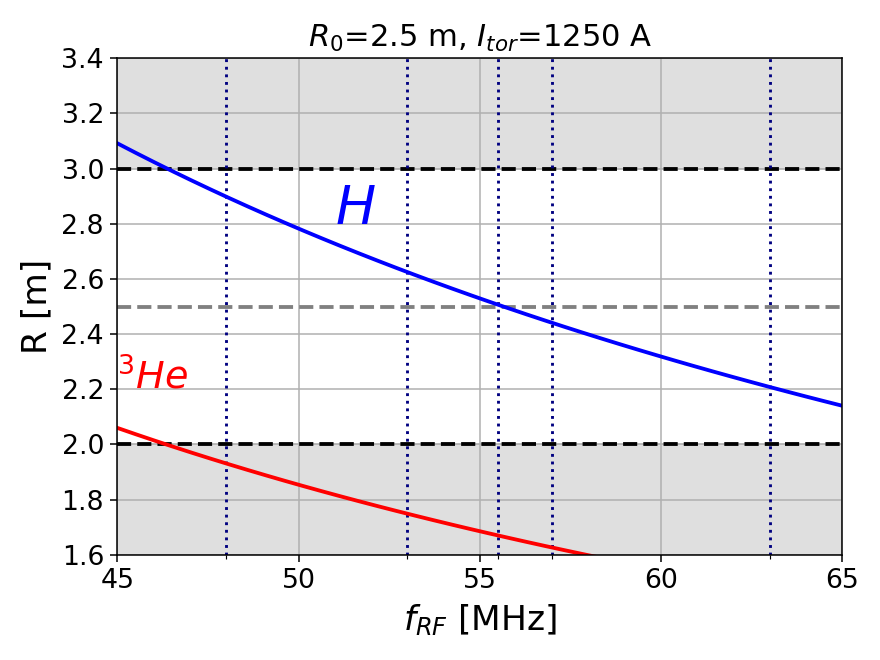

In [3]:
fix, ax = plt.subplots()

ax.plot(f_RF, R_cis_1H, lw=2, color='b')
ax.text(51,2.8, '$H$', color='b', fontsize=28)

ax.plot(f_RF, R_cis_2H, lw=2, color='g')
ax.text(57,5.5, '$2H$', color='g', fontsize=20)

ax.plot(f_RF, R_cis_He3, lw=2, color='r')
ax.text(45,2.2, '$^3He$', color='r', fontsize=20)

ax.set_xlim(45, 65)
ax.set_ylim(1.6, 3.4)
ax.axhspan(1.6, 2, color='gray', alpha=0.25)
ax.axhspan(3, 3.4, color='gray', alpha=0.25)
ax.hlines(2.0, 45, 65, color='k', linestyles='--', lw=2)
ax.hlines(2.5, 45, 65, color='gray', linestyles='--', lw=2)
ax.hlines(3.0, 45, 65, color='k', linestyles='--', lw=2)

ax.grid(True)
ax.set_title('$R_0$=2.5 m, $I_{tor}$=1250 A', fontsize=16)
ax.set_ylabel('R [m]', fontsize=18)
ax.set_xlabel('$f_{RF}$ [MHz]', fontsize=18)
# force rendering frequencies ticks at integer values locations (55.0 --> 55)
ax.xaxis.set_major_locator(plt.FixedLocator([45, 50, 55, 60, 65]))
ax.xaxis.set_minor_locator(plt.FixedLocator(source_frequencies))

ax.tick_params(labelsize=14)
#ax.set_xticklabels([str(i) for i in source_frequencies], minor=True)

# display preset source frequencies
for f_s in source_frequencies:
    ax.vlines(f_s, 1.6, 3.4, linestyle=':', color='navy')
    
plt.tight_layout()
plt.savefig('WEST_ICRH_R_vs_f.png')

# Toroidal current required for resonance at 2.5m vs frequency 

In [4]:
from posCouche.ic_utils import ion_mass_and_charge
from scipy.constants import pi

In [20]:
R_res_min = 2.40 # m
R_res_max = 2.76 # m

# generator frequencies
f_RF = np.linspace(40, 65, 40)
# resonance magnetic field -> associated toroidal coil current
Itor_H_min = IC_resonance_magnetic_field(f_RF, species='H') * R_res_min/0.0073
Itor_H_max = IC_resonance_magnetic_field(f_RF, species='H') * R_res_max/0.0073

Itor_He_min = IC_resonance_magnetic_field(f_RF, species='3He') * R_res_min/0.0073
Itor_He_max = IC_resonance_magnetic_field(f_RF, species='3He') * R_res_max/0.0073


<IPython.core.display.Javascript object>


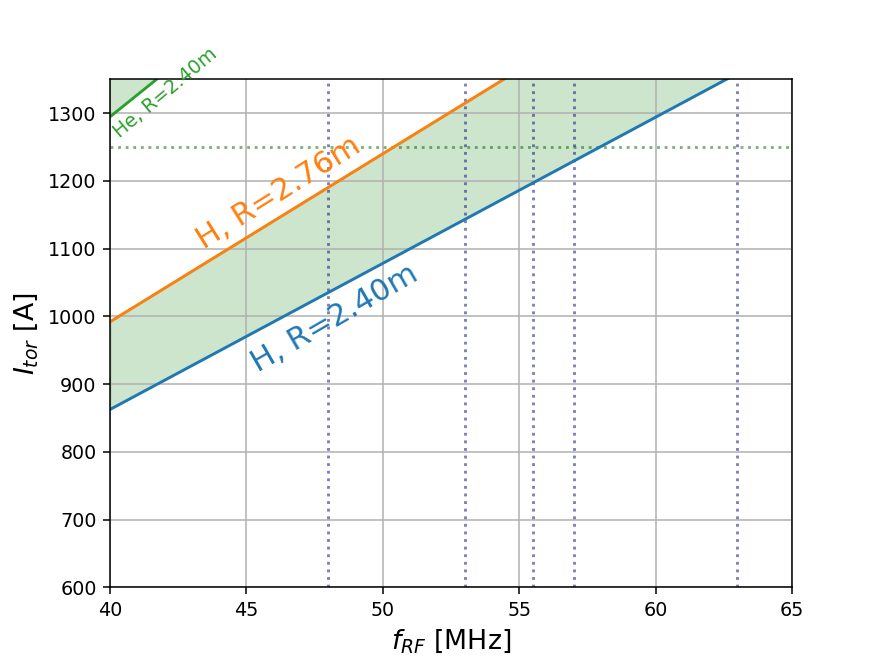

In [21]:
fig, ax = plt.subplots()
ax.fill_between(f_RF, Itor_H_min, Itor_H_max, alpha=0.2, color='g')
ax.fill_between(f_RF, Itor_He_min, Itor_He_max, alpha=0.2, color='g')

ax.plot(f_RF, Itor_H_min, f_RF, Itor_H_max)
ax.plot(f_RF, Itor_He_min, f_RF, Itor_He_max)

ax.text(45, 1050, 'H, R=2.40m', fontsize=16, rotation=30, color='#1f77b4')
ax.text(43, 1240, 'H, R=2.76m', fontsize=16, rotation=32, color='#ff7f0e')

ax.text(40, 1380, 'He, R=2.40m', fontsize=10, rotation=40, color='#2ca02c')

ax.set_xlim(40, 65)
ax.set_ylim(600, 1350)
ax.set_ylabel('$I_{tor}$ [A]', fontsize=14)
ax.set_xlabel('$f_{RF}$ [MHz]', fontsize=14)
ax.grid(True)

# display preset source frequencies
for f_s in source_frequencies:
    ax.vlines(f_s, 600, 1350, linestyle=':', color='navy', alpha=0.5)
ax.hlines(1250, 40, 65, linestyle=':', color='darkgreen', alpha=0.5)

fig.savefig('WEST_ICRH_Itor_f.png')

# Resonance layers vs Itor, frequency, harmonic number and species

<IPython.core.display.Javascript object>


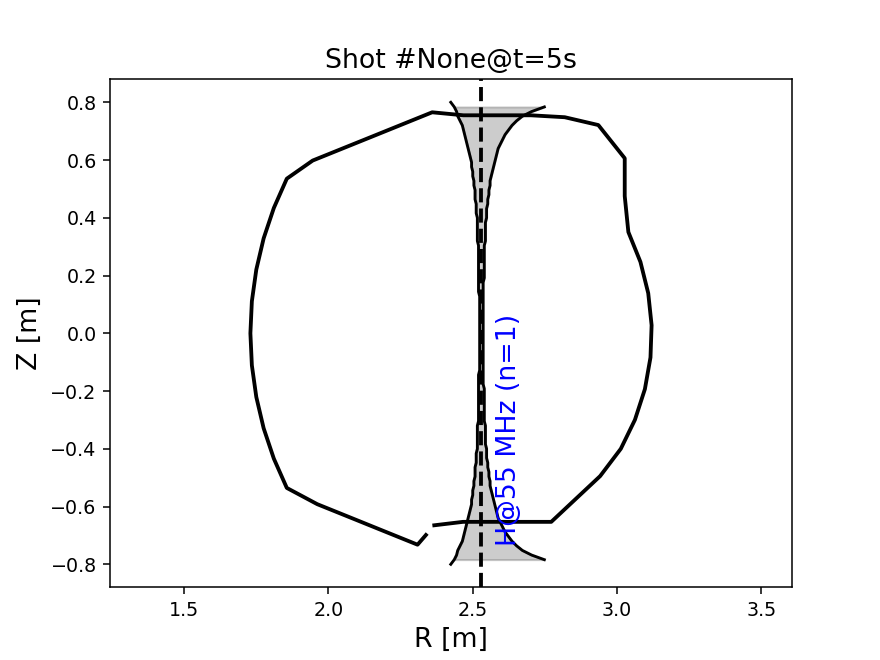

No shot number provided: using WEST vacuum vessel
Resonance radius for H = 2.529315044030706 m @55 MHz (n=1)


In [7]:
poscouche(Itor=1250, freq=55, n=1, species='H') # species can be 'H', 'D', 'T', '3He', '4He'

<IPython.core.display.Javascript object>


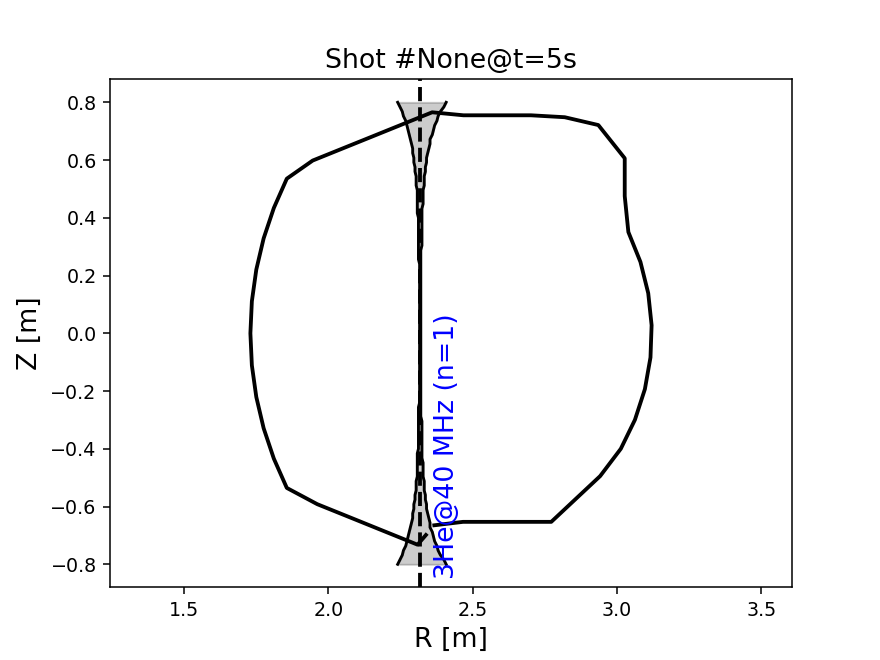

No shot number provided: using WEST vacuum vessel
Resonance radius for 3He = 2.3174739740135504 m @40 MHz (n=1)


In [8]:
poscouche(Itor=1250, freq=40, n=1, species='3He')

<IPython.core.display.Javascript object>


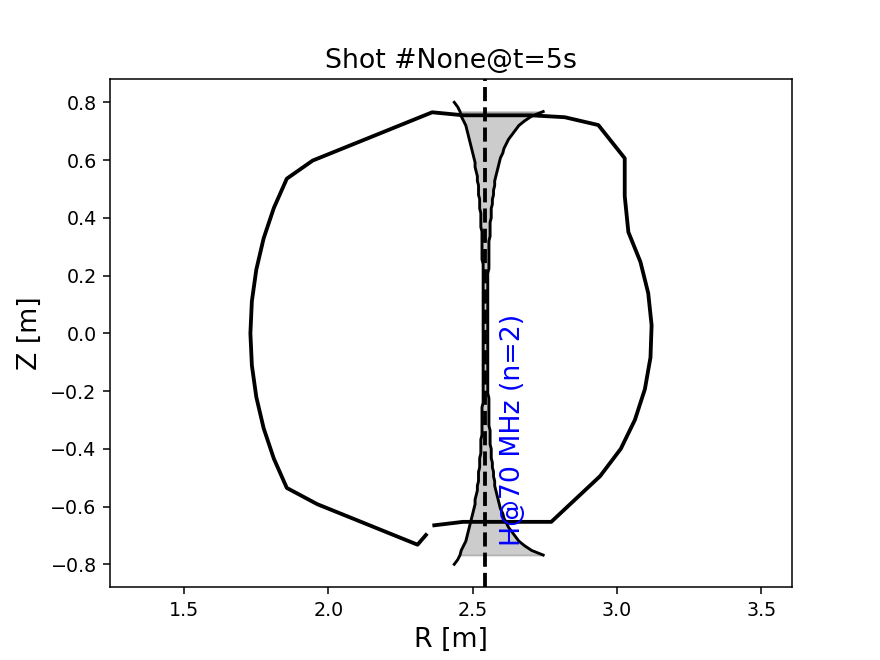

No shot number provided: using WEST vacuum vessel
Resonance radius for H = 2.543768272853739 m @70 MHz (n=2)


In [9]:
poscouche(Itor=800, freq=70, n=2, species='H')

<IPython.core.display.Javascript object>


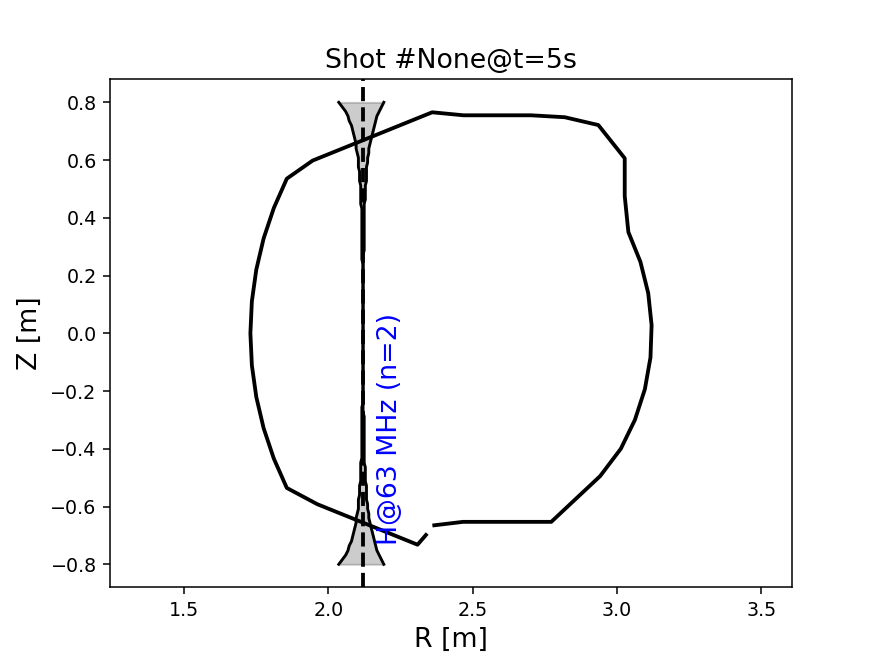

No shot number provided: using WEST vacuum vessel
Resonance radius for H = 2.1198068940447823 m @63 MHz (n=2)


In [10]:
poscouche(Itor=600, freq=63, n=2, species='H')

<IPython.core.display.Javascript object>


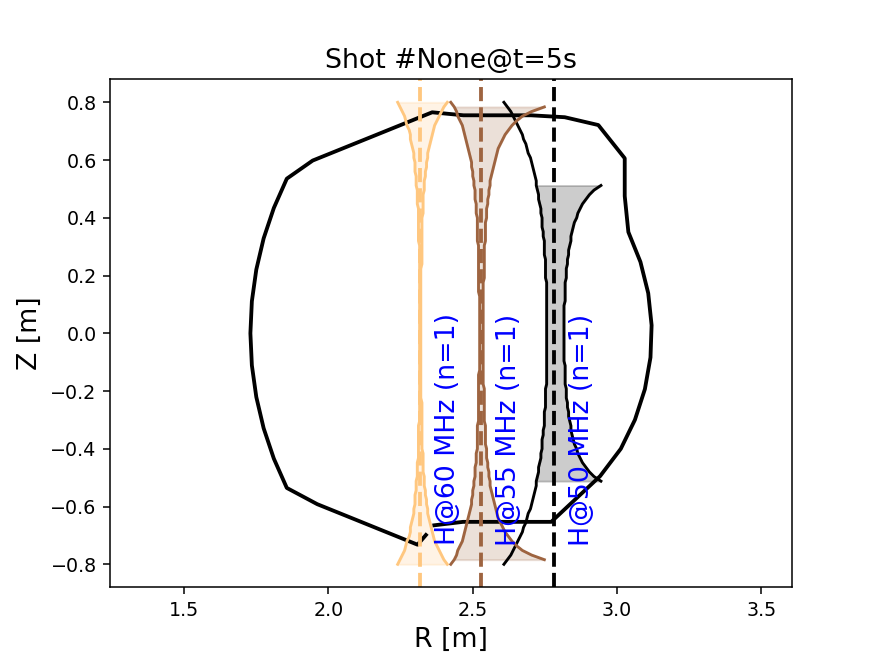

No shot number provided: using WEST vacuum vessel
Resonance radius for H = 2.782246548433777 m @50 MHz (n=1)
Resonance radius for H = 2.529315044030706 m @55 MHz (n=1)
Resonance radius for H = 2.318538790361481 m @60 MHz (n=1)


In [11]:
poscouche(freq=[50, 55, 60], Itor=1250, species='H')

# Resonance layer for a TS/WEST shot

<IPython.core.display.Javascript object>


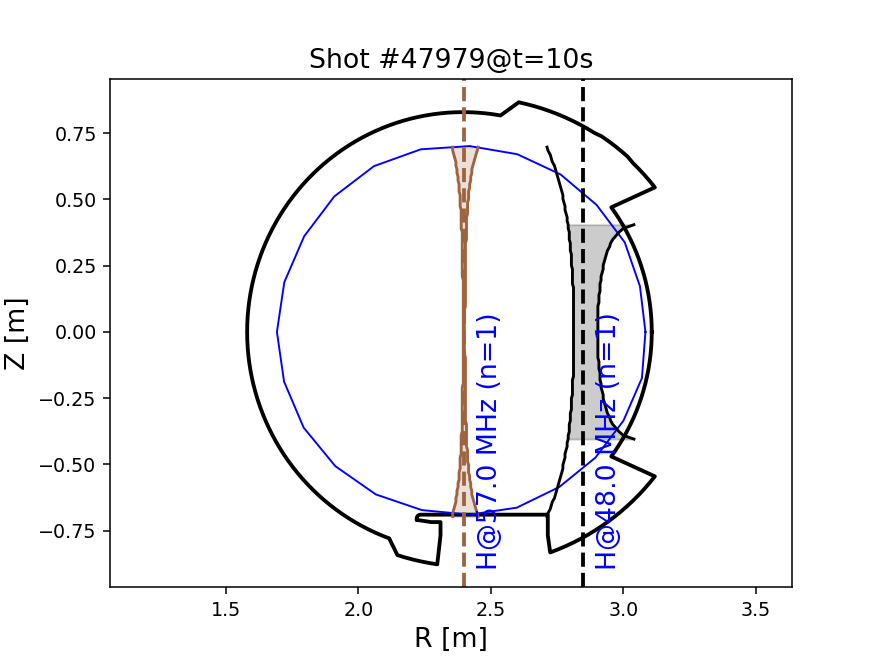

You're asking a lot of data, please wait
Resonance radius for H = [ 2.84811502] m @48.0 MHz (n=1)
Resonance radius for H = [ 2.39841265] m @57.0 MHz (n=1)


In [12]:
poscouche(shot=47979, time=10)       